##### In order to run the bellow cells, download Amazon datasets for electronics from https://amazon-reviews-2023.github.io/main.html and place them in the ```/data``` folder.

In [17]:
import json
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

Matplotlib is building the font cache; this may take a moment.


## Filter Items that have been observed for the first time in year 2022 or later.

In [ ]:
def filter_data(data: dict) -> dict:
    filter = False
    if int(data['details']['Date First Available'][-4:]) < 2022:
        filter = True

    return filter

In [5]:
with open("../data/meta_Electronics.jsonl", 'r') as fp:
    with open("../data/meta_Electronics_2022_2023.jsonl", 'a', encoding='utf-8') as fp_out:
        with open("../data/meta_Electronics_2022_2023_no_date.jsonl", 'a', encoding='utf-8') as fp_out_no_date:
            i = 0
            for line in fp:
                data = json.loads(line.strip())
                try:
                    filter = filter_data(data)
                    if not filter:
                        json.dump(data, fp_out)
                        fp_out.write('\n')
                        fp_out.flush()
                except:
                    json.dump(data, fp_out_no_date)
                    fp_out_no_date.write('\n')
                    fp_out_no_date.flush()
                i += 1
                if i % 10000 == 0:
                    print(f"Processed {i} lines")

Processed 10000 lines
Processed 20000 lines
Processed 30000 lines
Processed 40000 lines
Processed 50000 lines
Processed 60000 lines
Processed 70000 lines
Processed 80000 lines
Processed 90000 lines
Processed 100000 lines
Processed 110000 lines
Processed 120000 lines
Processed 130000 lines
Processed 140000 lines
Processed 150000 lines
Processed 160000 lines
Processed 170000 lines
Processed 180000 lines
Processed 190000 lines
Processed 200000 lines
Processed 210000 lines
Processed 220000 lines
Processed 230000 lines
Processed 240000 lines
Processed 250000 lines
Processed 260000 lines
Processed 270000 lines
Processed 280000 lines
Processed 290000 lines
Processed 300000 lines
Processed 310000 lines
Processed 320000 lines
Processed 330000 lines
Processed 340000 lines
Processed 350000 lines
Processed 360000 lines
Processed 370000 lines
Processed 380000 lines
Processed 390000 lines
Processed 400000 lines
Processed 410000 lines
Processed 420000 lines
Processed 430000 lines
Processed 440000 lin

## Split the items into two categories: "has main category", "does not have main category"

In [6]:
def filter_category(data: dict) -> dict:
    filter = False
    if data['main_category'] == None:
        filter = True

    return filter

In [8]:
with open("../data/meta_Electronics_2022_2023.jsonl", 'r') as fp:
    with open("../data/meta_Electronics_2022_2023_with_category.jsonl", 'a', encoding='utf-8') as fp_out:
        with open("../data/meta_Electronics_2022_2023_no_category.jsonl", 'a', encoding='utf-8') as fp_out_no_category:
            for line in fp:
                data = json.loads(line.strip())
                if not filter_category(data):
                    json.dump(data, fp_out)
                    fp_out.write('\n')
                    fp_out.flush()
                else:
                    json.dump(data, fp_out_no_category)
                    fp_out_no_category.write('\n')
                    fp_out_no_category.flush()

## Explore dsitribution by categories

In [10]:
df = pd.read_json("../data/meta_Electronics_2022_2023_with_category.jsonl", lines=True)

<Axes: xlabel='main_category'>

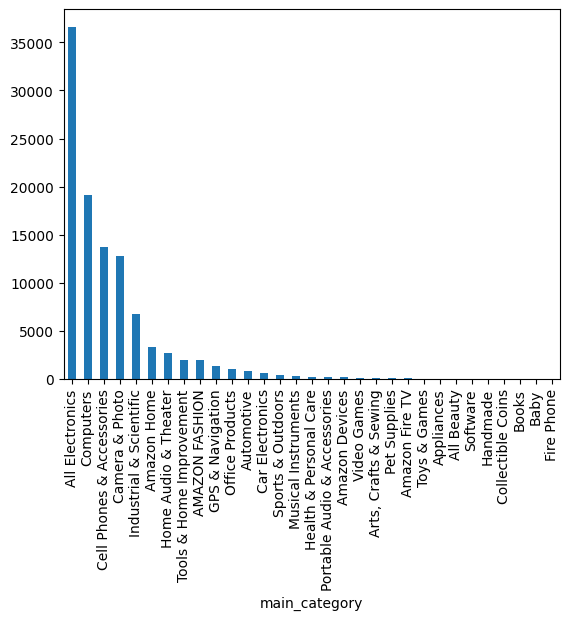

In [18]:
df['main_category'].value_counts().plot(kind='bar')

### Filter out items that have at least 100 ratings

In [19]:
df_ratings_100 = df[df['rating_number'] > 100]

## Explore distribution of ratings

<Axes: ylabel='Frequency'>

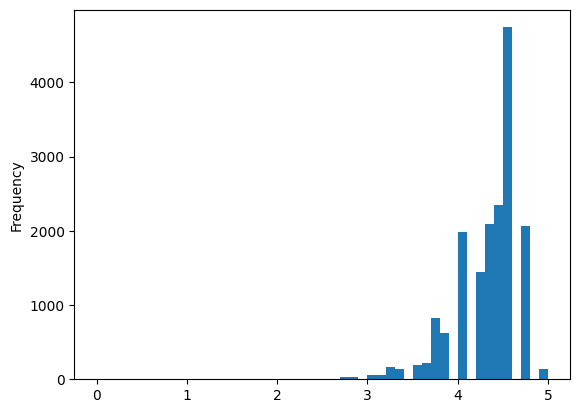

In [20]:
df_ratings_100['average_rating'].plot(kind='hist', bins=50, range=(0, 5))

#### Sample 1000 items

In [21]:
df_sample_1000 = df_ratings_100.sample(n=1000, random_state=20)

<Axes: ylabel='Frequency'>

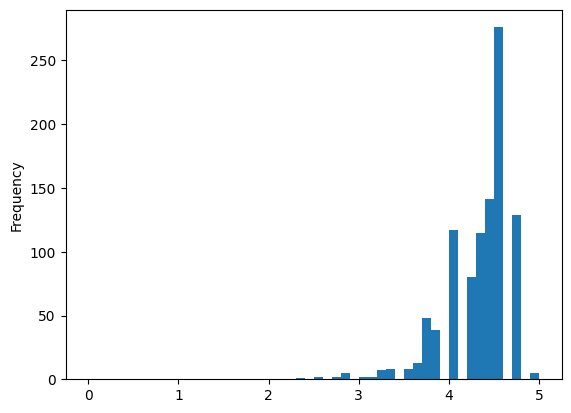

In [22]:
df_sample_1000['average_rating'].plot(kind='hist', bins=50, range=(0, 5))

<Axes: ylabel='Frequency'>

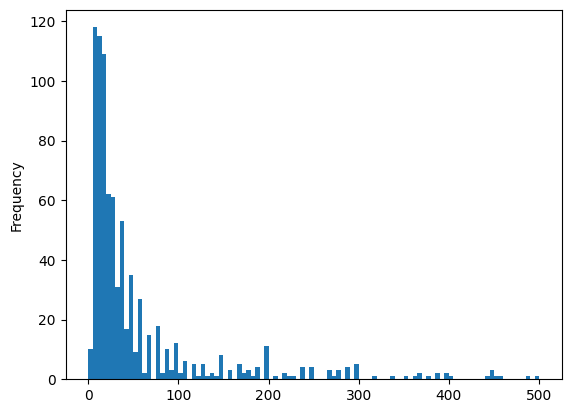

In [23]:
df_sample_1000['price'].plot(kind='hist', bins=100, range=(0, 500))

In [25]:
df_ratings_100.to_json("../data/meta_Electronics_2022_2023_with_category_ratings_100.jsonl", orient='records', lines=True)

In [26]:
df_sample_1000.to_json("../data/meta_Electronics_2022_2023_with_category_ratings_100_sample_1000.jsonl", orient='records', lines=True)

## Extract ratings that match sampled data.

In [27]:
df_ratings_100 = pd.read_json("../data/meta_Electronics_2022_2023_with_category_ratings_100.jsonl", lines=True)
df_sample_1000 = pd.read_json("../data/meta_Electronics_2022_2023_with_category_ratings_100_sample_1000.jsonl", lines=True)

In [28]:
with open("../data/Electronics.jsonl", 'r') as fp:
    with open("../data/Electornics_2022_2023_with_category_ratings_100.jsonl", 'a') as fp_out:
        id_list = set(df_ratings_100['parent_asin'].values)
        i = 0
        for line in fp:
            data = json.loads(line.strip())
            if data['parent_asin'] in id_list:
                json.dump(data, fp_out)
                fp_out.write('\n')
                fp_out.flush()
            i += 1
            if i % 100000 == 0:
                print(f"Processed {i} lines")

Processed 100000 lines
Processed 200000 lines
Processed 300000 lines
Processed 400000 lines
Processed 500000 lines
Processed 600000 lines
Processed 700000 lines
Processed 800000 lines
Processed 900000 lines
Processed 1000000 lines
Processed 1100000 lines
Processed 1200000 lines
Processed 1300000 lines
Processed 1400000 lines
Processed 1500000 lines
Processed 1600000 lines
Processed 1700000 lines
Processed 1800000 lines
Processed 1900000 lines
Processed 2000000 lines
Processed 2100000 lines
Processed 2200000 lines
Processed 2300000 lines
Processed 2400000 lines
Processed 2500000 lines
Processed 2600000 lines
Processed 2700000 lines
Processed 2800000 lines
Processed 2900000 lines
Processed 3000000 lines
Processed 3100000 lines
Processed 3200000 lines
Processed 3300000 lines
Processed 3400000 lines
Processed 3500000 lines
Processed 3600000 lines
Processed 3700000 lines
Processed 3800000 lines
Processed 3900000 lines
Processed 4000000 lines
Processed 4100000 lines
Processed 4200000 lines
P

In [29]:
with open("../data/Electornics_2022_2023_with_category_ratings_100.jsonl", 'r') as fp:
    with open("../data/Electornics_2022_2023_with_category_ratings_100_sample_1000.jsonl", 'a') as fp_out:
        id_list = set(df_sample_1000['parent_asin'].values)
        i = 0
        for line in fp:
            data = json.loads(line.strip())
            if data['parent_asin'] in id_list:
                json.dump(data, fp_out)
                fp_out.write('\n')
                fp_out.flush()
            i += 1
            if i % 100000 == 0:
                print(f"Processed {i} lines")

Processed 100000 lines
Processed 200000 lines
Processed 300000 lines
Processed 400000 lines
Processed 500000 lines
Processed 600000 lines
Processed 700000 lines
Processed 800000 lines
Processed 900000 lines
Processed 1000000 lines
Processed 1100000 lines
Processed 1200000 lines
Processed 1300000 lines
Processed 1400000 lines
Processed 1500000 lines
Processed 1600000 lines
Processed 1700000 lines


In [34]:
df_sample_1000.head()
# print(df_sample_1000.columns)

main_category                                              title  \
0  Industrial & Scientific  RAVODOI USB C Cable, [2Pack/3.3ft+6.6ft] USB T...   
1          All Electronics  SNESH-2 Pack USB-C Female to USB Male Adapter,...   
2          All Electronics  USB C Docking Station Dual Monitor for MacBook...   
3           Camera & Photo  [2023 Upgraded] Telescopes for Adults Astronom...   
4           AMAZON FASHION  Laptop Bag 15.6 Inch, Laptop Briefcase Messeng...   

   average_rating  rating_number  \
0             4.4            119   
1             4.5            352   
2             3.9           1193   
3             4.1            219   
4             4.5            222   

                                            features description   price  \
0  [„ÄêFast Charging Cord„ÄëThese USB C cables provid...          []     NaN   
1  [üîπ(Light & compact) Easy to carry and light we...          []    4.99   
2  [„Äê18-in-1Docking Station„ÄëWith USB C Docking St...          []     NaN   
3  [üéÅ„Äê2023 All New Experience„ÄëThe newly upgraded ...          []  169.99   
4  [Leather,Mesh, Imported, Multi-pockets and Lar...          []   24.95   

                                              images  \
0  [{'thumb': 'https://m.media-amazon.com/images/...   
1  [{'thumb': 'https://m.media-amazon.com/images/...   
2  [{'thumb': 'https://m.media-amazon.com/images/...   
3  [{'thumb': 'https://m.media-amazon.com/images/...   
4  [{'thumb': 'https://m.media-amazon.com/images/...   

                                              videos    store  \
0  [{'title': 'Type-C Charger Cable ', 'url': 'ht...  RAVODOI   
1  [{'title': 'USB Male & Female Adapter', 'url':...    SNESH   
2                                                 []  ZMUIPNG   
3  [{'title': 'Good picture quality', 'url': 'htt...   HUTACT   
4                                                 []   KPIQIU   

                                          categories  \
0  [Electronics, Computers & Accessories, Compute...   
1  [Electronics, Computers & Accessories, Compute...   
2  [Electronics, Computers & Accessories, Laptop ...   
3  [Electronics, Camera & Photo, Binoculars & Sco...   
4  [Electronics, Computers & Accessories, Laptop ...   

                                             details parent_asin  \
0  {'Brand': 'RAVODOI', 'Connector Type': 'USB Ty...  B09R4Y2HKY   
1  {'Package Dimensions': '3.54 x 2.4 x 0.35 inch...  B09JV5FM2S   
2  {'Product Dimensions': '3.94"L x 1.18"W x 3.94...  B09SFN9NRX   
3  {'Product Dimensions': '32.5"D x 5.5"W x 9.7"H...  B09TP3SZ7C   
4  {'Product Dimensions': '16 x 2 x 12 inches; 1....  B0B5H7T7XZ   

   bought_together  subtitle  author  
0              NaN       NaN     NaN  
1              NaN       NaN     NaN  
2              NaN       NaN     NaN  
3              NaN       NaN     NaN  
4              NaN       NaN     NaN

In [32]:
df_ratings_100.head()

main_category  \
0  Cell Phones & Accessories   
1                Amazon Home   
2  Cell Phones & Accessories   
3             Camera & Photo   
4  Cell Phones & Accessories   

                                               title  average_rating  \
0  May Chen Compatible with MacBook Pro 16 inch C...             4.5   
1  Nurse Stickers for Water Bottles and Laptop, N...             4.6   
2  CoBak Case for Kindle Paperwhite - All New PU ...             4.8   
3  8x8ft Pink Rose Flower Theme Photography Backd...             4.5   
4  Aiminu USB C to Lightning Cable 6ft 2Pack, Fas...             4.5   

   rating_number                                           features  \
0            649  [„Äê COMPATIBLE WITH „Äë Designed to Fits Perfectl...   
1            123                                                 []   
2           1064  [Fit: Perfect cutout and shape, specially desi...   
3            358  [ ö…ûSizeÔºö8x8FT 2.4 m wide by 2.4 m tall,Item se...   
4           5763  [„ÄêUniversal Compatibility„ÄëAiminu USB-C to ligh...   

                                         description  price  \
0  [May Chen High Quality Plastic Hard Shell Case...  26.99   
1                                                 []   8.99   
2                                                 []  18.95   
3  [Details 1. The item color as the picture show...  38.90   
4                                                 []  10.99   

                                              images  \
0  [{'thumb': 'https://m.media-amazon.com/images/...   
1  [{'thumb': 'https://m.media-amazon.com/images/...   
2  [{'thumb': 'https://m.media-amazon.com/images/...   
3  [{'thumb': 'https://m.media-amazon.com/images/...   
4  [{'thumb': 'https://m.media-amazon.com/images/...   

                                              videos      store  \
0  [{'title': 'MOSISO Plastic Hard Shell  Compati...   May Chen   
1  [{'title': 'Nursing stickers that are waterpro...  ABAMERICA   
2  [{'title': 'kindle paperwhite case', 'url': 'h...      CoBak   
3  [{'title': 'Avezano Brand Video', 'url': 'http...        XLL   
4  [{'title': 'Great charging cord! Threading mak...     Aiminu   

                                          categories  \
0  [Electronics, Computers & Accessories, Laptop ...   
1  [Electronics, Computers & Accessories, Laptop ...   
2  [Electronics, eBook Readers & Accessories, Cov...   
3  [Electronics, Camera & Photo, Lighting & Studi...   
4  [Electronics, Computers & Accessories, Compute...   

                                             details parent_asin  \
0  {'Standing screen display size': '16 Inches', ...  B0822SL7JX   
1  {'Brand': 'ABAMERICA', 'Color': 'C3- Medium & ...  B0B1BXC6W1   
2  {'Package Dimensions': '7.09 x 5.12 x 0.67 inc...  B0C5XLH1HM   
3  {'Package Dimensions': '10.94 x 9.57 x 1.97 in...  B08XQ8PS2J   
4  {'Brand': 'Aiminu', 'Connector Type': 'USB Typ...  B0B7WT4RZK   

   bought_together  subtitle  author  
0              NaN       NaN     NaN  
1              NaN       NaN     NaN  
2              NaN       NaN     NaN  
3              NaN       NaN     NaN  
4              NaN       NaN     NaN